In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#to init a neural netwok
from keras.models import Sequential
#to add convulation layer
from keras.layers import Conv2D
#to making pooling
from keras.layers import MaxPooling2D
#to flattening
from keras.layers import Flatten
#to create hidden node
from keras.layers import Dense

Using TensorFlow backend.


In [3]:
seq=Sequential()
seq.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
seq.add(MaxPooling2D((2, 2)))
seq.add(Flatten())
seq.add(Dense(128, activation='relu'))
seq.add(Dense(1,activation='sigmoid'))
seq.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [4]:
from keras.models import load_model
seq=load_model("weights-improvement.hdf5")

In [5]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        'dataset/training_set/',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')
test_set = test_datagen.flow_from_directory(
        'dataset/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [6]:
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = seq.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
    print('dog')
else:
    prediction = 'cat'
    print('cat')

dog


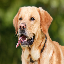

In [8]:
image.load_img('dataset/single_prediction/cat_or_dog_1.jpg',target_size=(64,64))

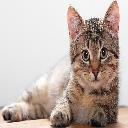

In [9]:
image.load_img('dataset/single_prediction/cat_or_dog_2.jpg',target_size=(128,128))

In [10]:
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_2.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = seq.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
    print('dog')
else:
    prediction = 'cat'
    print('cat')

cat
